In [117]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
import warnings
warnings.filterwarnings('ignore')

mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

mouseDF =pd.read_csv(mouse_drug_data_to_load)
clinicalDF = pd.read_csv(clinical_trial_data_to_load)

totalDF = pd.merge(clinicalDF, mouseDF, on='Mouse ID', how='outer')
totalDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [118]:
# group by drug and timepoint

drug_timeGroup = totalDF.groupby(['Drug', 'Timepoint'])
drug_timeDF = pd.DataFrame(drug_timeGroup['Tumor Volume (mm3)'].mean())
drug_timeDF.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [119]:
# Standard Error of Tumor Volume
tumor_vol_STDERR = drug_timeGroup['Tumor Volume (mm3)'].sem()
tumor_vol_STDERR_DF = pd.DataFrame(tumor_vol_STDERR)
tumor_vol_STDERR_DF.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [120]:
# Data  Munging
drug_time_reformmatedDF = drug_timeDF.unstack('Drug')
drug_time_reformmatedDF = drug_time_reformmatedDF['Tumor Volume (mm3)']

drug_time_STDERR_reformmatedDF = tumor_vol_STDERR_DF.unstack('Drug')
drug_time_STDERR_reformmatedDF = drug_time_STDERR_reformmatedDF['Tumor Volume (mm3)']
drug_time_reformmatedDF

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [121]:
# Similarly formatted table with std err to easily pull a series for each drug
drug_time_STDERR_reformmatedDF

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


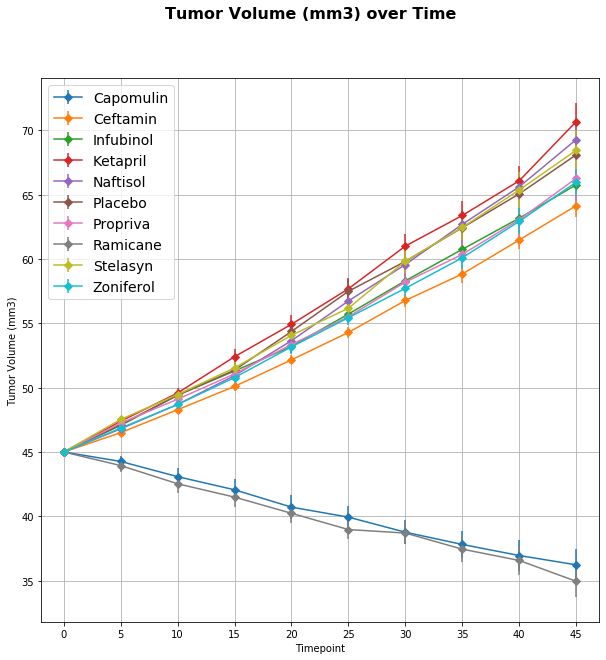

In [122]:
# Tumor Volume over Time with Errorbars
x_axis = drug_time_reformmatedDF.index
handles = drug_time_STDERR_reformmatedDF.columns

fig1, ax1 = plt.subplots()
fig1.suptitle("Tumor Volume (mm3) over Time", fontsize=16, fontweight="bold")
fig1.set_figwidth(10)
fig1.set_figheight(10)

for x in handles:
    ax1.errorbar(x_axis, drug_time_reformmatedDF[x], yerr=drug_time_STDERR_reformmatedDF[x], marker='D')


ax1.set_xlim(-2, 47)
ax1.set_xlabel('Timepoint')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.legend(handles, loc=2, prop={'size': 14})
ax1.set_xticks(np.arange(0,50,5))



plt.savefig('Tumor Volume (mm3) over time.png')
ax1.grid()
plt.show()

In [123]:
# Metastatic sites

metastaticDF = pd.DataFrame(drug_timeGroup['Metastatic Sites'].mean())
metastaticDF.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [124]:
# Standard Error of Metastatic Sites

metastatic_STDERR = drug_timeGroup['Metastatic Sites'].sem()
metastatic_STDERR_DF = pd.DataFrame(metastatic_STDERR)
metastatic_STDERR_DF.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [125]:
# Reformatting data frame

metastatic_reformmatedDF = metastaticDF.unstack('Drug')
metastatic_reformmatedDF = metastatic_reformmatedDF['Metastatic Sites']
metastatic_reformmatedDF

metastatic_reformmated_STDERR_DF = metastatic_STDERR_DF.unstack('Drug')
metastatic_reformmated_STDERR_DF = metastatic_reformmated_STDERR_DF['Metastatic Sites']

metastatic_reformmatedDF

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [126]:
metastatic_reformmated_STDERR_DF

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


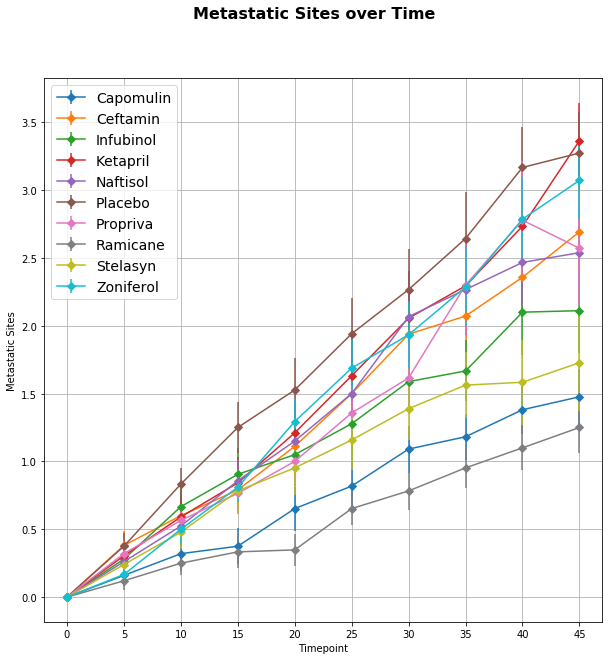

In [127]:
# Metastatic Sites over Time with Errorbars

x_axis = metastatic_reformmatedDF.index
handles = metastatic_reformmated_STDERR_DF.columns

fig2, ax2 = plt.subplots()
fig2.suptitle("Metastatic Sites over Time", fontsize=16, fontweight="bold")
fig2.set_figwidth(10)
fig2.set_figheight(10)

for x in handles:
    ax2.errorbar(x_axis, metastatic_reformmatedDF[x], yerr=metastatic_reformmated_STDERR_DF[x], marker='D')


ax2.set_xlim(-2, 47)
ax2.set_xlabel('Timepoint')
ax2.set_ylabel('Metastatic Sites')
ax2.legend(handles, loc=2, prop={'size': 14})
ax2.set_xticks(np.arange(0,50,5))



plt.savefig('Metastatic Sites over time.png')
ax2.grid()
plt.show()

In [128]:
# Survival Rate

mouse_count = drug_timeGroup['Mouse ID'].count()
mouse_countDF= pd.DataFrame(mouse_count)
mouse_countDF.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [129]:
# Reformating the Mouse Count Data

mouse_count_reformatDF = mouse_countDF.unstack('Drug')
mouse_count_reformatDF = mouse_count_reformatDF['Mouse ID']
mouse_count_reformatDF

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [134]:
# Converting Dataframe to hold % survival
handles = mouse_count_reformatDF.columns
survival_percentDF = mouse_count_reformatDF.copy()
for x in handles:
    survival_percentDF[x] = ((mouse_count_reformatDF[x]/mouse_count_reformatDF[x].at[0])*100)
survival_percentDF

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


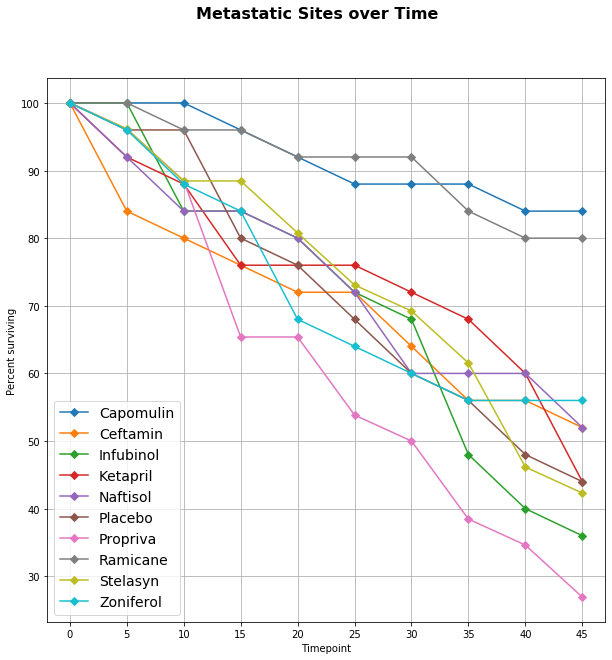

In [135]:
# % Survivng over Time with Errorbars

x_axis = mouse_count_reformatDF.index
handles = mouse_count_reformatDF.columns

fig3, ax3 = plt.subplots()
fig3.suptitle("Metastatic Sites over Time", fontsize=16, fontweight="bold")
fig3.set_figwidth(10)
fig3.set_figheight(10)

for x in handles:
    ax3.plot(x_axis, survival_percentDF[x], marker='D')


ax3.set_xlim(-2, 47)
ax3.set_xlabel('Timepoint')
ax3.set_ylabel('Percent surviving')
ax3.legend(handles, loc=3, prop={'size': 14})
ax3.set_xticks(np.arange(0,50,5))



plt.savefig('Percent Surviving over time.png')
ax3.grid()
plt.show()

In [145]:
# Change in tumor volume at the end of treatment

tumor_change = []

for x in handles:
    tumor_change.append(((drug_time_reformmatedDF[x].at[45] - drug_time_reformmatedDF[x].at[0])
                        / drug_time_reformmatedDF[x].at[0])*100)
tumor_changeDF = pd.DataFrame(tumor_change, index=handles)
tumor_changeDF = tumor_changeDF.rename(columns={0: 'Percent Change in Volume'})
tumor_changeDF

,Percent Change in Volume
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


In [146]:
# Create a tuple to store the values


(10, 1)